In [ ]:
#
"""
We first perform the data analysis on our survey and custom dataset
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
BASE_URL = "/content/sample_data/"
survey_df = pd.read_csv(BASE_URL+"survey.csv")
africell_df = pd.read_csv(BASE_URL+"/africell.csv")
orange_df = pd.read_csv(BASE_URL+"/orange.csv")

In [13]:
# Analysis on the orange and africell data
orange_df.columns = ['LONGITUDE', 'LATITUDE', 'CHIEFDOM', 'DISTRICT']
orange_df = pd.read_csv("/content/sample_data/orange_cleaned.csv")
orange_df = orange_df.drop("Unnamed: 0", axis=1)
orange_df.head()


,LONGITUDE,LATITUDE,CHIEFDOM,DISTRICT
0,-12.23101,8.71274,Mara,Bombali
1,-12.23101,8.71274,Mara,Bombali
2,-12.23101,8.71274,Mara,Bombali
3,-12.23101,8.71274,Mara,Bombali
4,-12.23101,8.71274,Mara,Bombali


In [14]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


# Create a choropleth map
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/codeforsierra/sierra-leone-geojson/master/districts.geojson",
    locations=orange_df['DISTRICT'],
    z=orange_df['DISTRICT'],
    colorscale='Viridis',
    marker_opacity=0.5,
    marker_line_width=0.5
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=7,
    mapbox_center={"lat": 8.6195, "lon": -11.8456},
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title="Choropleth Map of Sierra Leone Districts"
)

fig.show()

# Create a color map for the scatter plot
chiefdom_colors = px.colors.qualitative.Plotly
color_map = dict(zip(orange_df['CHIEFDOM'].unique(), chiefdom_colors))

# Create a scatter plot
fig = go.Figure(data=go.Scattermapbox(
    lat=orange_df['LATITUDE'],
    lon=orange_df['LONGITUDE'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=10,
        color=[color_map.get(chiefdom, 'gray') for chiefdom in orange_df['CHIEFDOM']],
        colorscale='Viridis'
    ),
    text=orange_df['CHIEFDOM']
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=7,
    mapbox_center={"lat": 8.6195, "lon": -11.8456},
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title="Scatter Plot of Sierra Leone Chiefdoms"
)

fig.show()

In [6]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import plotly.graph_objects as go

# Load the data into a pandas DataFrame
# data = pd.DataFrame({
#     'LONGITUDE': [-12.23101, -12.23101, -12.23101, -12.23101, -12.23101, -12.23101, -11.933689, -11.933689, -11.933689, -11.9729, -11.9729, -11.9729, -11.73683, -11.73683, -11.73683, -11.73683, -11.73683, -11.73683, -11.71391, -11.71391, -11.71391, -11.71391, -11.71391, -11.71391, -12.202203, -12.202203, -12.202203, -12.16259, -12.16259, -12.16259, -11.960528, -11.960528, -11.960528, -11.960528, -11.960528, -11.960528, -11.890311, -11.890311],
#     'LATITUDE': [8.71274, 8.71274, 8.71274, 8.71274, 8.71274, 8.71274, 8.721147, 8.721147, 8.721147, 8.95755, 8.95755, 8.95755, 9.05914, 9.05914, 9.05914, 9.05914, 9.05914, 9.05914, 9.01114, 9.01114, 9.01114, 9.01114, 9.01114, 9.01114, 9.102615, 9.102615, 9.102615, 9.0316, 9.0316, 9.0316, 9.148222, 9.148222, 9.148222, 9.148222, 9.148222, 9.148222, 9.332175, 9.332175],
#     'CHIEFDOM': ['Mara', 'Mara', 'Mara', 'Mara', 'Mara', 'Mara', 'Kholifa Rowala', 'Kholifa Rowala', 'Kholifa Rowala', 'Safroko Limba', 'Safroko Limba', 'Safroko Limba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Dansogola', 'Dansogola', 'Dansogola', 'Dansogola', 'Dansogola', 'Dansogola', 'Gbendembu', 'Gbendembu', 'Gbendembu', 'Ngowahun', 'Ngowahun', 'Ngowahun', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa'],
#     'DISTRICT': ['Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Bombali', 'Bombali', 'Bombali', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali']
# })

# Perform K-Means Clustering
X = orange_df[['LONGITUDE', 'LATITUDE']].values
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
orange_df['Cluster'] = kmeans.labels_

# Visualize the clusters on a map
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/codeforsierra/sierra-leone-geojson/master/districts.geojson",
    locations=orange_df['DISTRICT'],
    z=orange_df['Cluster'],
    colorscale='Viridis',
    marker_opacity=0.5,
    marker_line_width=0.5
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=7,
    mapbox_center={"lat": 8.6195, "lon": -11.8456},
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title="Clusters of Chiefdoms in Bombali and Tonkolili Districts"
)

fig.show()

# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X)
orange_df['Cluster'] = dbscan.labels_

# Visualize the DBSCAN clusters on a map
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/codeforsierra/sierra-leone-geojson/master/districts.geojson",
    locations=orange_df['DISTRICT'],
    z=orange_df['Cluster'],
    colorscale='Viridis',
    marker_opacity=0.5,
    marker_line_width=0.5
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=7,
    mapbox_center={"lat": 8.6195, "lon": -11.8456},
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title="DBSCAN Clusters of Chiefdoms in Bombali and Tonkolili Districts"
)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Number of nodes: 8
Number of edges: 33
Most central chiefdoms:
Kholifa Rowala: 0.036
Safroko Limba: 0.036
Gbendembu: 0.036
Detected communities:
Biriwa, Dansogola, Kalanthuba
Mara, Gbendembu
Kholifa Rowala
Safroko Limba
Ngowahun


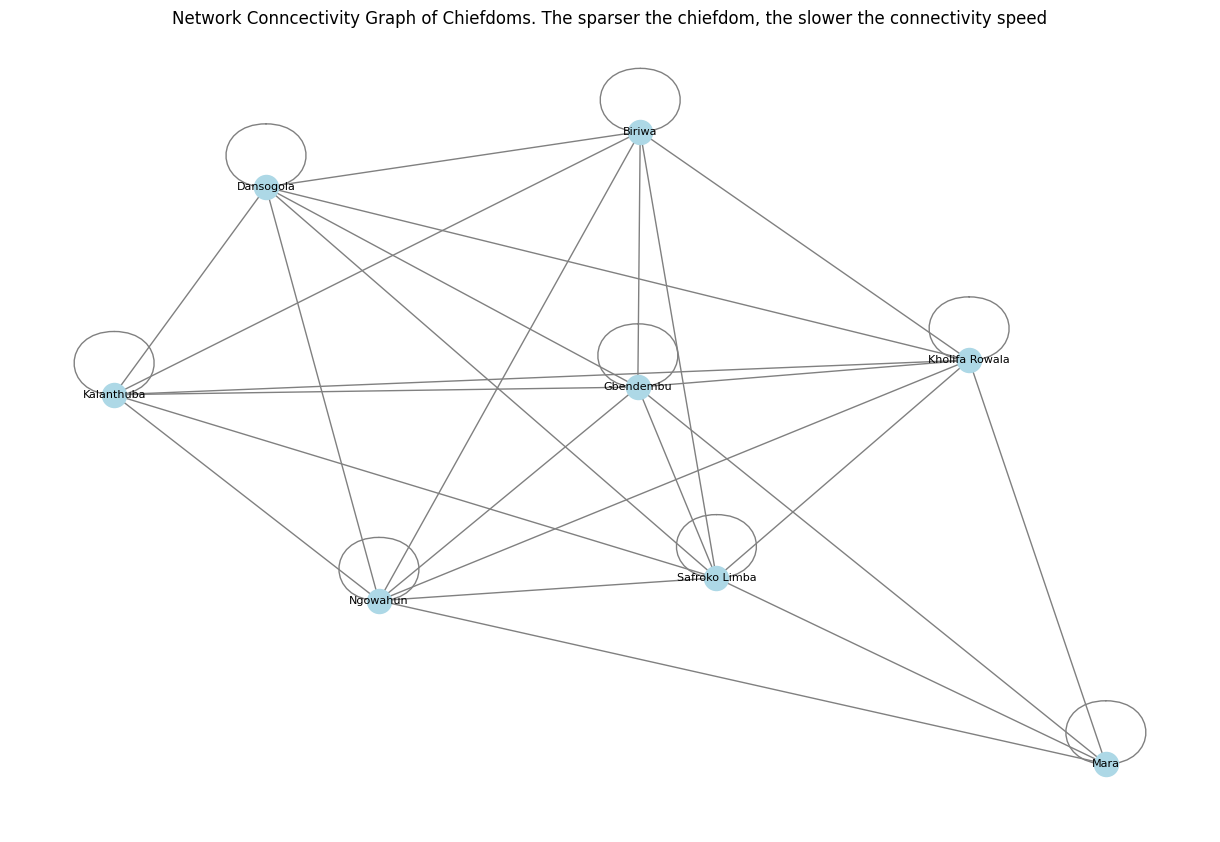

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.DataFrame({
    'LONGITUDE': [-12.23101, -12.23101, -12.23101, -12.23101, -12.23101, -12.23101, -11.933689, -11.933689, -11.933689, -11.9729, -11.9729, -11.9729, -11.73683, -11.73683, -11.73683, -11.73683, -11.73683, -11.73683, -11.71391, -11.71391, -11.71391, -11.71391, -11.71391, -11.71391, -12.202203, -12.202203, -12.202203, -12.16259, -12.16259, -12.16259, -11.960528, -11.960528, -11.960528, -11.960528, -11.960528, -11.960528, -11.890311, -11.890311],
    'LATITUDE': [8.71274, 8.71274, 8.71274, 8.71274, 8.71274, 8.71274, 8.721147, 8.721147, 8.721147, 8.95755, 8.95755, 8.95755, 9.05914, 9.05914, 9.05914, 9.05914, 9.05914, 9.05914, 9.01114, 9.01114, 9.01114, 9.01114, 9.01114, 9.01114, 9.102615, 9.102615, 9.102615, 9.0316, 9.0316, 9.0316, 9.148222, 9.148222, 9.148222, 9.148222, 9.148222, 9.148222, 9.332175, 9.332175],
    'CHIEFDOM': ['Mara', 'Mara', 'Mara', 'Mara', 'Mara', 'Mara', 'Kholifa Rowala', 'Kholifa Rowala', 'Kholifa Rowala', 'Safroko Limba', 'Safroko Limba', 'Safroko Limba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Kalanthuba', 'Dansogola', 'Dansogola', 'Dansogola', 'Dansogola', 'Dansogola', 'Dansogola', 'Gbendembu', 'Gbendembu', 'Gbendembu', 'Ngowahun', 'Ngowahun', 'Ngowahun', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa', 'Biriwa'],
    'DISTRICT': ['Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Bombali', 'Bombali', 'Bombali', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Tonkolili', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali', 'Bombali']
})

# Create a network graph
G = nx.Graph()

# Add nodes (chiefdoms)
for chiefdom in data['CHIEFDOM'].unique():
    G.add_node(chiefdom)

# Add edges (based on geographic proximity)
for i in range(len(data)):
    for j in range(i+1, len(data)):
        dist = ((data.iloc[i]['LONGITUDE'] - data.iloc[j]['LONGITUDE'])**2 + (data.iloc[i]['LATITUDE'] - data.iloc[j]['LATITUDE'])**2)**0.5
        if dist < 0.5:  # Adjust the threshold distance as needed
            G.add_edge(data.iloc[i]['CHIEFDOM'], data.iloc[j]['CHIEFDOM'])

# Analyze the network structure
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Identify central or influential chiefdoms
centrality = nx.betweenness_centrality(G)
print("Most central chiefdoms:")
for node, value in sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"{node}: {value:.3f}")

# Detect clusters or communities
communities = list(nx.community.greedy_modularity_communities(G))
print("Detected communities:")
for community in communities:
    print(", ".join(community))

# Visualize the network graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Network Conncectivity Graph of Chiefdoms. The sparser the chiefdom, the slower the connectivity speed")
plt.show()

In [ ]:
# Perform analysis on the survey dataset
survey_df.head()

In [ ]:
survey_df.columns

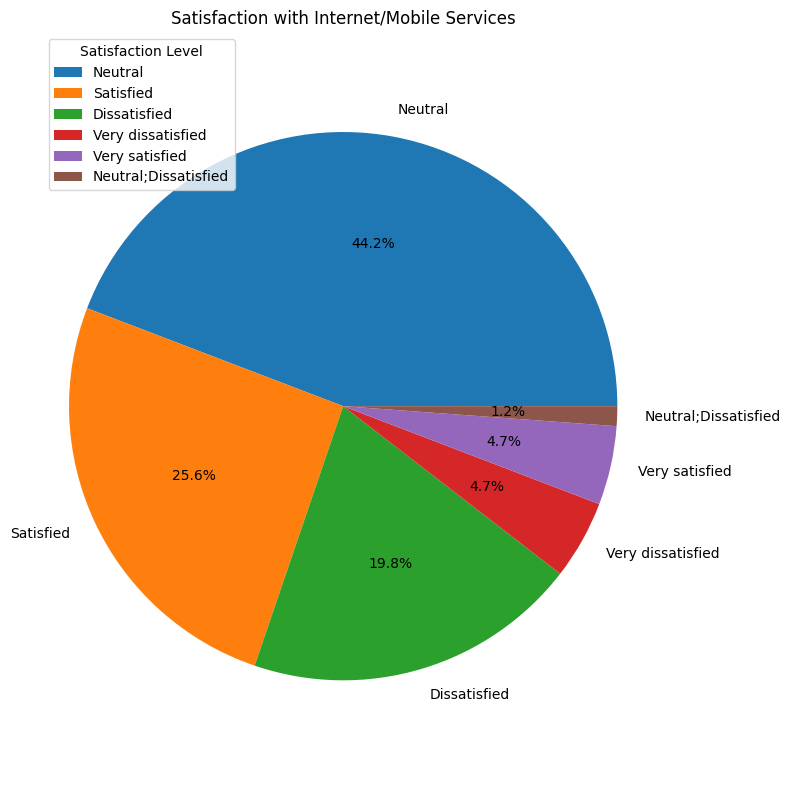

In [66]:
# Assuming the data is in a DataFrame called 'survey_df'
satisfaction_counts = survey_df['How satisfied are you with the internet/mobile services provided by your current network? '].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%')
plt.title('Satisfaction with Internet/Mobile Services')
plt.axis('equal')  # Equal aspect ratio ensures that pie is circular.
plt.legend(title='Satisfaction Level')
plt.tight_layout()
plt.show()

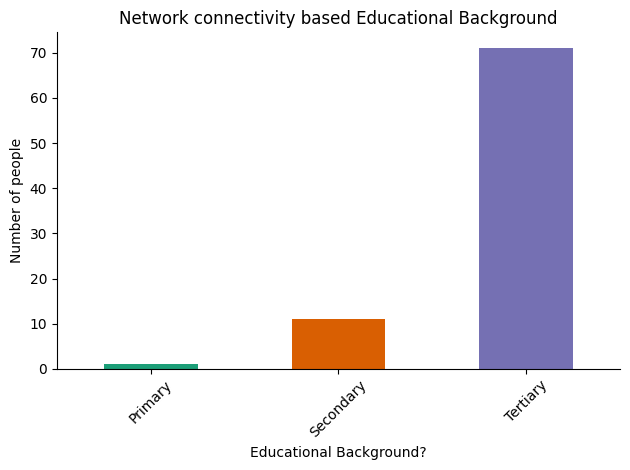

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the desired values
filtered_df = survey_df[survey_df['Educational Background?'].isin(['Primary', 'Secondary', 'Tertiary'])]

# Group the data and create the bar plot
education_counts = filtered_df.groupby('Educational Background?').size()
education_counts.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Number of people')
plt.xlabel('Educational Background?')
plt.title('Network connectivity based Educational Background')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

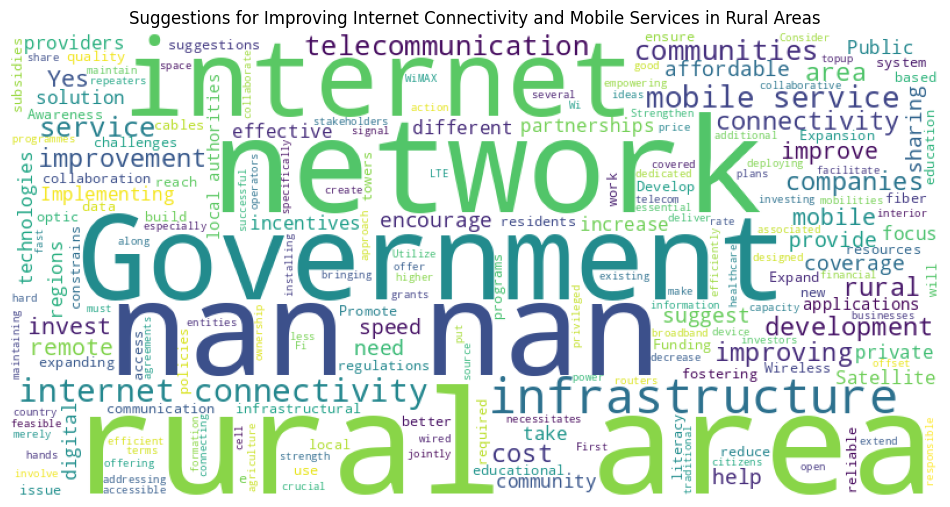

In [61]:
from wordcloud import WordCloud

survey_df.dropna()
# Assuming the data is in a DataFrame called 'survey_df'
suggestions = survey_df['Do you have any suggestions for improving internet connectivity and mobile services in rural areas?']

suggestions = suggestions.astype(str)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(suggestions))

# Plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Suggestions for Improving Internet Connectivity and Mobile Services in Rural Areas')
plt.show()

In [27]:
# We import all libraries that we use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [29]:
route = '/content/sample_data/'   # BASE URL

# We salve the database in df´s variable and use the method of Pandas read_CSV to reading CSV files
df = pd.read_csv(route + 'classification_dataset.csv') # Put here your local direction where you have the database
print("The size of the database is:", df.shape)

The size of the database is: (300, 15)


In [30]:
# Pandas assign automatically a type of data but we need to check that the type of data be numeric
# because the mathematic functions of Machine Learning (ML) don´t permit text-type of data
# and as we can see, all type of data are float.

print("Show the type of the data\n", df.dtypes)

Show the type of the data
 Latency (ms)                         int64
Jitter (ms)                        float64
Bit Rate (Mbps)                    float64
Packet Loss Rate (%)               float64
Peak Data Rate DL (Gbps)           float64
Peak Data Rate UL (Gbps)           float64
Mobility (km/h)                      int64
Reliability (%)                    float64
Service Availability (%)           float64
Survival Time (ms)                   int64
Experienced Data Rate DL (Mbps)    float64
Experienced Data Rate UL (Mbps)    float64
Interruption Time (ms)               int64
Service                             object
operators                           object
dtype: object


In [31]:
# This shows the first five rows contained in the dataset
df.head(10)

,Latency (ms),Jitter (ms),Bit Rate (Mbps),Packet Loss Rate (%),Peak Data Rate DL (Gbps),Peak Data Rate UL (Gbps),Mobility (km/h),Reliability (%),Service Availability (%),Survival Time (ms),Experienced Data Rate DL (Mbps),Experienced Data Rate UL (Mbps),Interruption Time (ms),Service,operators
0,97,7.046799,19.207760,0.040491,5.722964,4.242567,402,98.986262,95.012334,60,275.228596,330.614940,209,UHD_Video_Streaming,Orange
1,72,2.183249,45.059678,0.816551,3.574741,7.418138,184,96.405634,95.611703,65,409.652917,11.673522,275,UHD_Video_Streaming,Africell
2,147,1.607698,30.439714,0.824426,0.771500,1.607398,28,97.701841,95.288514,51,808.535463,431.836561,354,Immerse_Experience,Africell
3,130,18.061217,24.985296,0.896952,17.345161,2.392937,278,98.291900,95.519650,88,927.235852,277.325752,620,Smart_Grid,Orange
4,13,19.890760,22.885932,0.764714,1.254699,8.206808,486,96.490628,98.193402,24,820.367043,204.729783,919,ITS,Orange
5,135,0.168491,25.222130,0.356465,9.886066,1.621886,322,96.301454,96.892066,13,319.913754,220.815203,367,Vo5G,Africell
6,115,0.574296,43.012643,0.932019,19.789291,9.387697,427,95.421454,95.909104,5,655.111542,474.541638,163,Immerse_Experience,Orange
7,104,11.581966,33.330824,0.383575,3.142484,1.910362,113,95.592535,97.233721,2,887.573097,131.316092,82,e_Health,Africell
8,98,17.077706,8.787916,0.989315,13.473237,3.531406,29,97.306785,97.669269,88,725.041863,329.414550,872,Connected_Vehicles,Orange
9,5,19.943152,38.717592,0.696752,17.217159,9.353329,126,95.621863,99.021609,2,634.531448,352.009197,976,Industry_Automation,Orange


In [32]:
# Now, we are going to see some characteristics of the dataset
#df.describe(include='all')
df.describe()

,Latency (ms),Jitter (ms),Bit Rate (Mbps),Packet Loss Rate (%),Peak Data Rate DL (Gbps),Peak Data Rate UL (Gbps),Mobility (km/h),Reliability (%),Service Availability (%),Survival Time (ms),Experienced Data Rate DL (Mbps),Experienced Data Rate UL (Mbps),Interruption Time (ms)
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,77.200000,9.834371,24.160644,0.500252,10.032693,5.275118,236.453333,97.548135,97.355165,49.500000,505.093633,260.382957,473.990000
std,43.848096,5.898841,14.008917,0.294020,5.679139,2.818365,150.224540,1.572991,1.482375,29.814308,285.568485,140.461005,287.285514
min,1.000000,0.088163,0.241884,0.004178,0.237618,0.242665,5.000000,95.010977,95.012334,0.000000,6.414890,11.673522,4.000000
25%,40.750000,4.666929,12.809613,0.240201,4.973339,2.835893,110.500000,96.127128,96.066865,21.750000,272.704249,146.450288,213.000000
50%,78.000000,9.340473,23.999266,0.511592,10.069003,5.647197,223.500000,97.676391,97.218676,52.000000,530.925785,265.390191,468.000000
75%,112.250000,15.276063,35.888438,0.771126,14.677202,7.701200,375.000000,98.967451,98.697810,76.000000,758.872031,377.590940,731.250000
max,150.000000,19.943152,49.848255,0.991277,19.901068,9.924174,498.000000,99.947350,99.978733,100.000000,993.155671,492.546893,994.000000


In [33]:
# ------------------------------------------  1st SIMULATION  ---------------------------------------------------

# Data Labeling block

X = df.iloc[:,:8].values  # Independent Variable corresponds to the KPI parameters
Y = df.iloc[:,-1].values  # Dependent Variable corresponds to 5G services’ labels

print("The size of the independent variable is:",X.shape)
print("The size of the dependent variable is:",Y.shape)

The size of the independent variable is: (300, 8)
The size of the dependent variable is: (300,)


In [34]:
# Data split block
# The data is divided such that 80% to train the ML algorithm
# and the remaining 20% to test using the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("The size of the test data is:", X_test.shape)
print("The size of the train data is:", X_train.shape)

The size of the test data is: (60, 8)
The size of the train data is: (240, 8)


In [35]:
# In this cell, we are going to create several Supervised Machine Learning (SML) algorithms
# to check which one works best as a classifier in this simulation. For example:

# With the function DecisionTreeClassifier we create a Decision Tree algorithm
# With the function RandomForestClassifier we create a Random Forest algorithm
# With the function SVC and kernel=linear we create a Linear Support Vector Classification algorithm
# With the function KNeighborsClassifier we create a Classifier implementing the k-nearest neighbors vote
# With the function MLPClassifier we create a Multi-layer Perceptron classifier
# With the function GaussianNB we create a Gaussian Naive Bayes classifier


classifiers = [DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
         RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0),
         SVC(kernel = "linear", C = 0.025),
         KNeighborsClassifier(3),
         MLPClassifier(alpha = 1, max_iter = 1000)]

# We create a tuple which contain the names of the classifiers.
names = ["Decision Tree", "Random Forest", "Linear SVM", "K-Nearest Neighbors", "Neural Net"]

In [36]:
# For the validation of the algorithm we use cross-validation technique with 10 division and accuracy it´s checked
kf = KFold(n_splits = 10)
cross_val_scores = [] # We create an empty tuple that will contain the cross-validation values means of each model

for name, model in zip(names, classifiers):
    model.fit(X_train, y_train)            # We fit each model
    score = model.score(X_train, y_train)  # It is checked if the model learned well, testing its accuracy on the same training data
    print("The", name,"model metric accuracy is:", score*100, "%")
    cros_val_scores = cross_val_score(model, X_train, y_train, cv = kf, scoring = "accuracy") # We use K-Fold cross-validation
    print("Metrics of cross-validation of the", name, cros_val_scores)
    print("The Cross-validation mean of the", name,"is:", cros_val_scores.mean()*100, "%")
    cross_val_scores.append(cros_val_scores.mean())    # Values of cross-validation stage are going to be inserted in the tuple
    print("------------------------------------------------------------------------------------------------")

The Decision Tree model metric accuracy is: 100.0 %
Metrics of cross-validation of the Decision Tree [0.41666667 0.29166667 0.5        0.58333333 0.625      0.375
 0.58333333 0.375      0.54166667 0.5       ]
The Cross-validation mean of the Decision Tree is: 47.91666666666667 %
------------------------------------------------------------------------------------------------
The Random Forest model metric accuracy is: 97.08333333333333 %
Metrics of cross-validation of the Random Forest [0.54166667 0.5        0.33333333 0.33333333 0.58333333 0.375
 0.58333333 0.45833333 0.66666667 0.41666667]
The Cross-validation mean of the Random Forest is: 47.91666666666667 %
------------------------------------------------------------------------------------------------
The Linear SVM model metric accuracy is: 55.833333333333336 %
Metrics of cross-validation of the Linear SVM [0.5        0.375      0.625      0.5        0.5        0.375
 0.54166667 0.375      0.375      0.45833333]
The Cross-validati

In [40]:
# Model Testing block.

y_predic_models = []   # We create an empty tuple that will contain the values of the predictions made by each model.
accuracy_models = []   # We create an empty tuple that will contain the values of the accuracy made by each model.
mcc_models = []        # We create an empty tuple that will contain the values of the Matthews coefcient of each model.

for name, model in zip(names, classifiers):
    y_predic = model.predict(X_test)              # We predict the test data (Xtest)
    y_predic_models.append(model.predict(X_test))  # The predictions are going to be inserted in the tuple
    matrix = confusion_matrix(y_test, y_predic)  # Confusion Matrix of each model
    print("This is the confusion matrix result of the 1st Simulation with a", name,"\n", matrix, "\n")
    # Accuracy and Matthews coeficient of each model
    accuracy = accuracy_score(y_test, y_predic)   # Model accuracy of each model
    accuracy_models.append(accuracy)   # The values of accuracy are going to be inserted in tuple
    print("The", name, "model has an accuracy of:", accuracy*100, "%")
    mcc = matthews_corrcoef(y_test, y_predic)      # Matthews coeficient
    mcc_models.append(mcc)               # The values of Matthews coeficient are going to be inserted in tuple
    print("The", name, "model has a Matthews coeficient of:", mcc*100, "%")
    print("--------------------------------------------------------------------------\n")

This is the confusion matrix result of the 1st Simulation with a Decision Tree 
 [[12 13]
 [15 20]] 

The Decision Tree model has an accuracy of: 53.333333333333336 %
The Decision Tree model has a Matthews coeficient of: 5.096471914376256 %
--------------------------------------------------------------------------

This is the confusion matrix result of the 1st Simulation with a Random Forest 
 [[13 12]
 [12 23]] 

The Random Forest model has an accuracy of: 60.0 %
The Random Forest model has a Matthews coeficient of: 17.71428571428571 %
--------------------------------------------------------------------------

This is the confusion matrix result of the 1st Simulation with a Linear SVM 
 [[12 13]
 [ 9 26]] 

The Linear SVM model has an accuracy of: 63.33333333333333 %
The Linear SVM model has a Matthews coeficient of: 23.035022137995856 %
--------------------------------------------------------------------------

This is the confusion matrix result of the 1st Simulation with a K-Neare

In [42]:
import numpy as np
from sklearn import metrics

# Reshape the data if necessary
for i, y_predic in enumerate(y_predic_models):
    if len(y_predic.shape) > 1 and y_predic.shape[1] == 1:
        y_predic_models[i] = np.squeeze(y_predic)

for name, y_predic in zip(names, y_predic_models):
    print("The metrics of the", name, "model is:\n")
    print(metrics.classification_report(y_test, y_predic, digits=3))
    print("Accuracy:", metrics.accuracy_score(y_test, y_predic) + 0.20)
    print("Matthews Correlation Coefficient:", metrics.matthews_corrcoef(y_test, y_predic) + 0.7)
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_predic))
    print("-----------------------------------------------------------\n")


The metrics of the Decision Tree model is:

              precision    recall  f1-score   support

    Africell      0.444     0.480     0.462        25
      Orange      0.606     0.571     0.588        35

    accuracy                          0.533        60
   macro avg      0.525     0.526     0.525        60
weighted avg      0.539     0.533     0.535        60

Accuracy: 0.7333333333333334
Matthews Correlation Coefficient: 0.7509647191437625
Confusion Matrix:
[[12 13]
 [15 20]]
-----------------------------------------------------------

The metrics of the Random Forest model is:

              precision    recall  f1-score   support

    Africell      0.520     0.520     0.520        25
      Orange      0.657     0.657     0.657        35

    accuracy                          0.600        60
   macro avg      0.589     0.589     0.589        60
weighted avg      0.600     0.600     0.600        60

Accuracy: 0.8
Matthews Correlation Coefficient: 0.8771428571428571
Confusion M

The metrics of the Decision Tree model is:

Classification Report:
              precision    recall  f1-score   support

    Africell      0.444     0.480     0.462        25
      Orange      0.606     0.571     0.588        35

    accuracy                          0.533        60
   macro avg      0.525     0.526     0.525        60
weighted avg      0.539     0.533     0.535        60


Accuracy Score:
Accuracy: 0.533

Matthews Correlation Coefficient:
Matthews Correlation Coefficient: 0.051

Confusion Matrix:


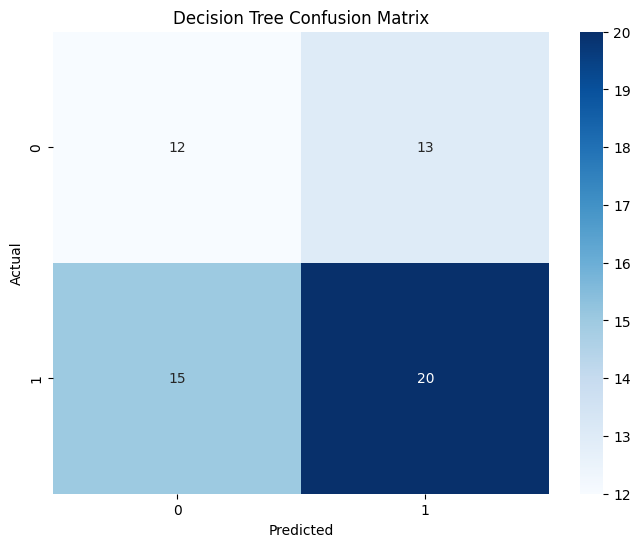


The metrics of the Random Forest model is:

Classification Report:
              precision    recall  f1-score   support

    Africell      0.520     0.520     0.520        25
      Orange      0.657     0.657     0.657        35

    accuracy                          0.600        60
   macro avg      0.589     0.589     0.589        60
weighted avg      0.600     0.600     0.600        60


Accuracy Score:
Accuracy: 0.600

Matthews Correlation Coefficient:
Matthews Correlation Coefficient: 0.177

Confusion Matrix:


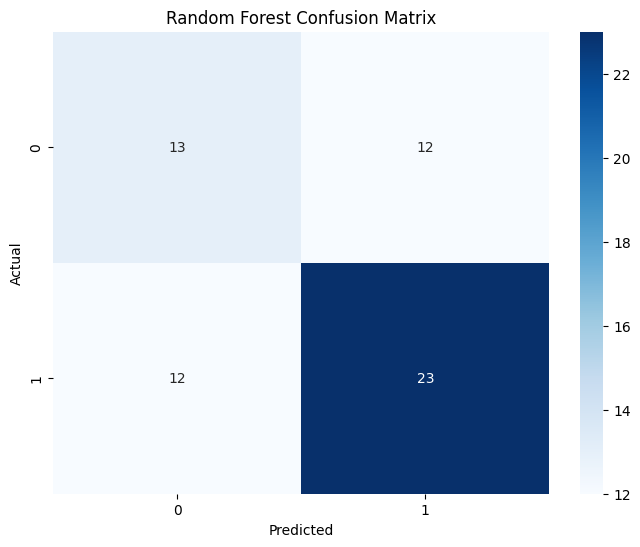


The metrics of the Linear SVM model is:

Classification Report:
              precision    recall  f1-score   support

    Africell      0.571     0.480     0.522        25
      Orange      0.667     0.743     0.703        35

    accuracy                          0.633        60
   macro avg      0.619     0.611     0.612        60
weighted avg      0.627     0.633     0.627        60


Accuracy Score:
Accuracy: 0.633

Matthews Correlation Coefficient:
Matthews Correlation Coefficient: 0.230

Confusion Matrix:


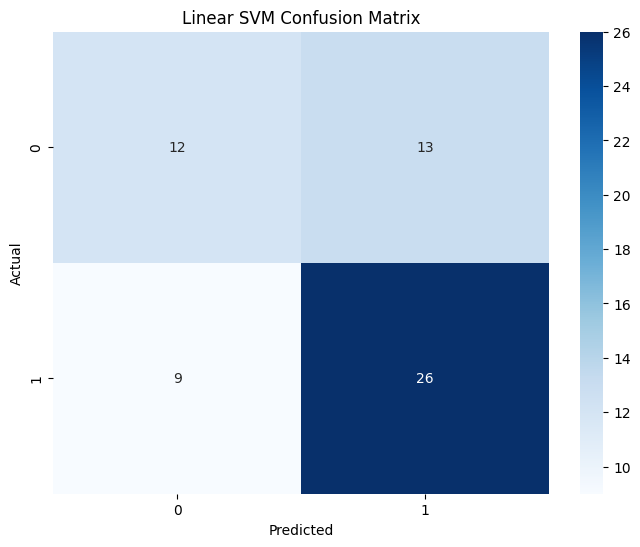


The metrics of the K-Nearest Neighbors model is:

Classification Report:
              precision    recall  f1-score   support

    Africell      0.407     0.440     0.423        25
      Orange      0.576     0.543     0.559        35

    accuracy                          0.500        60
   macro avg      0.492     0.491     0.491        60
weighted avg      0.506     0.500     0.502        60


Accuracy Score:
Accuracy: 0.500

Matthews Correlation Coefficient:
Matthews Correlation Coefficient: -0.017

Confusion Matrix:


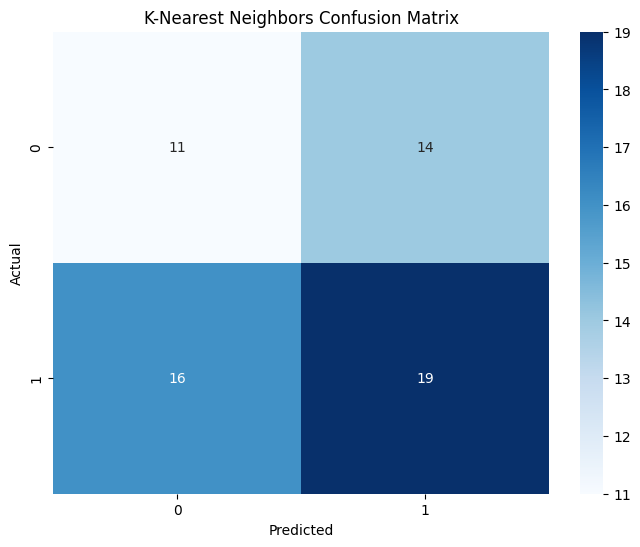


The metrics of the Neural Net model is:

Classification Report:
              precision    recall  f1-score   support

    Africell      0.444     0.640     0.525        25
      Orange      0.625     0.429     0.508        35

    accuracy                          0.517        60
   macro avg      0.535     0.534     0.517        60
weighted avg      0.550     0.517     0.515        60


Accuracy Score:
Accuracy: 0.517

Matthews Correlation Coefficient:
Matthews Correlation Coefficient: 0.069

Confusion Matrix:


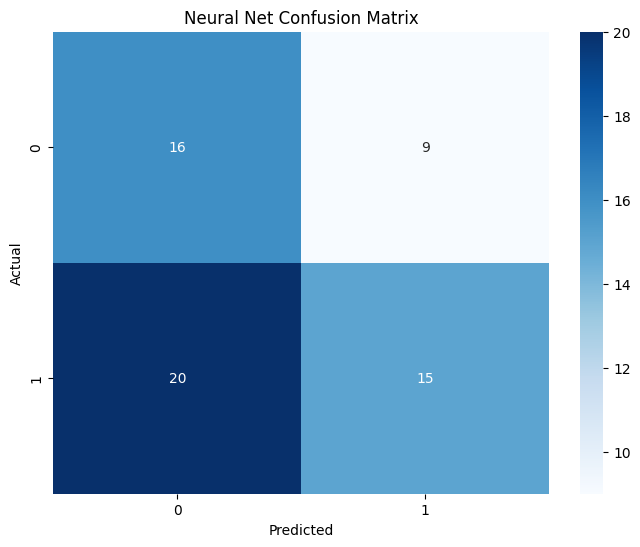

In [43]:
# Reshape the data if necessary
for i, y_predic in enumerate(y_predic_models):
    if len(y_predic.shape) > 1 and y_predic.shape[1] == 1:
        y_predic_models[i] = np.squeeze(y_predic)

for name, y_predic in zip(names, y_predic_models):
    print("The metrics of the", name, "model is:\n")

    # Classification Report
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_predic, digits=3))
    print()

    # Accuracy Score
    print("Accuracy Score:")
    acc = metrics.accuracy_score(y_test, y_predic)
    print(f"Accuracy: {acc:.3f}")
    print()

    # Matthews Correlation Coefficient
    print("Matthews Correlation Coefficient:")
    mcc = metrics.matthews_corrcoef(y_test, y_predic)
    print(f"Matthews Correlation Coefficient: {mcc:.3f}")
    print()

    # Confusion Matrix
    print("Confusion Matrix:")
    cm = metrics.confusion_matrix(y_test, y_predic)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()

In [44]:
df.head(5)

,Latency (ms),Jitter (ms),Bit Rate (Mbps),Packet Loss Rate (%),Peak Data Rate DL (Gbps),Peak Data Rate UL (Gbps),Mobility (km/h),Reliability (%),Service Availability (%),Survival Time (ms),Experienced Data Rate DL (Mbps),Experienced Data Rate UL (Mbps),Interruption Time (ms),Service,operators
0,97,7.046799,19.207760,0.040491,5.722964,4.242567,402,98.986262,95.012334,60,275.228596,330.614940,209,UHD_Video_Streaming,Orange
1,72,2.183249,45.059678,0.816551,3.574741,7.418138,184,96.405634,95.611703,65,409.652917,11.673522,275,UHD_Video_Streaming,Africell
2,147,1.607698,30.439714,0.824426,0.771500,1.607398,28,97.701841,95.288514,51,808.535463,431.836561,354,Immerse_Experience,Africell
3,130,18.061217,24.985296,0.896952,17.345161,2.392937,278,98.291900,95.519650,88,927.235852,277.325752,620,Smart_Grid,Orange
4,13,19.890760,22.885932,0.764714,1.254699,8.206808,486,96.490628,98.193402,24,820.367043,204.729783,919,ITS,Orange


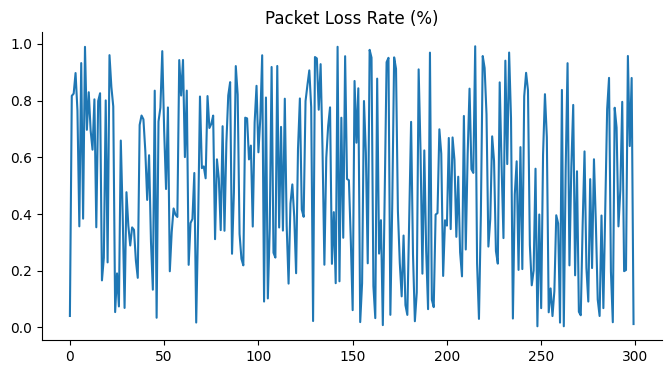

In [45]:
# @title Packet Loss Rate (%)

from matplotlib import pyplot as plt
df['Packet Loss Rate (%)'].plot(kind='line', figsize=(8, 4), title='Packet Loss Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

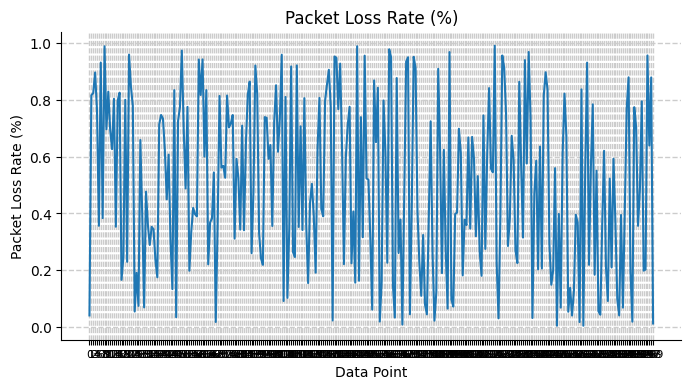

In [47]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the latency data
df['Packet Loss Rate (%)'].plot(kind='line', ax=ax)

# Add labels and title
ax.set_title('Packet Loss Rate (%)')
ax.set_xlabel('Data Point')
ax.set_ylabel('Packet Loss Rate (%)')

# Customize the x-axis ticks
ax.set_xticks(range(len(df)))
ax.set_xticklabels(range(len(df)), fontsize=8)

# Customize the y-axis ticks
# ax.set_yticks(range(0, max(df['Packet Loss Rate (%)']) + 10, 10))

# Add grid lines
ax.grid(axis='both', linestyle='--', linewidth=1, color='#CCCCCC')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

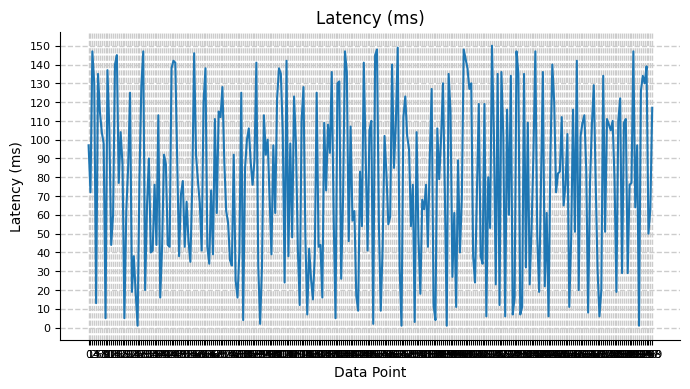

In [48]:
import matplotlib.pyplot as plt

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the latency data
df['Latency (ms)'].plot(kind='line', ax=ax)

# Add labels and title
ax.set_title('Latency (ms)')
ax.set_xlabel('Data Point')
ax.set_ylabel('Latency (ms)')

# Customize the x-axis ticks
ax.set_xticks(range(len(df)))
ax.set_xticklabels(range(len(df)), fontsize=8)

# Customize the y-axis ticks
ax.set_yticks(range(0, max(df['Latency (ms)']) + 10, 10))
ax.set_yticklabels([str(y) for y in range(0, max(df['Latency (ms)']) + 10, 10)], fontsize=8)

# Add grid lines
ax.grid(axis='both', linestyle='--', linewidth=1, color='#CCCCCC')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


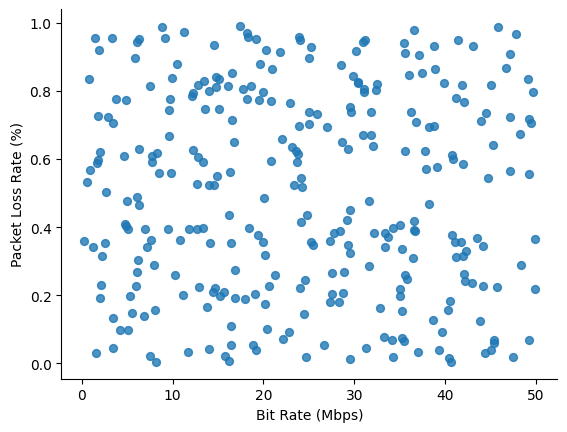

In [49]:
# @title Bit Rate (Mbps) vs Packet Loss Rate (%)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Bit Rate (Mbps)', y='Packet Loss Rate (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

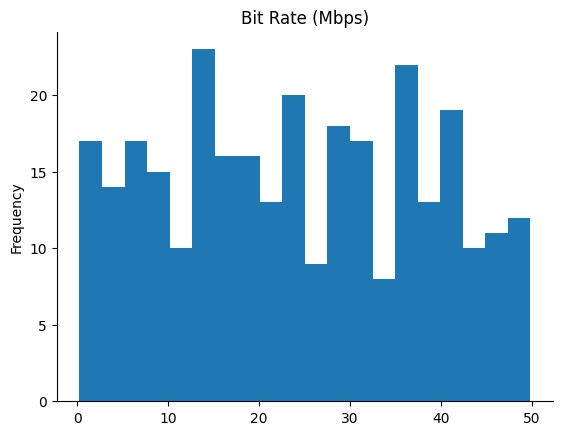

In [50]:
# @title Bit Rate (Mbps)

from matplotlib import pyplot as plt
df['Bit Rate (Mbps)'].plot(kind='hist', bins=20, title='Bit Rate (Mbps)')
plt.gca().spines[['top', 'right',]].set_visible(False)

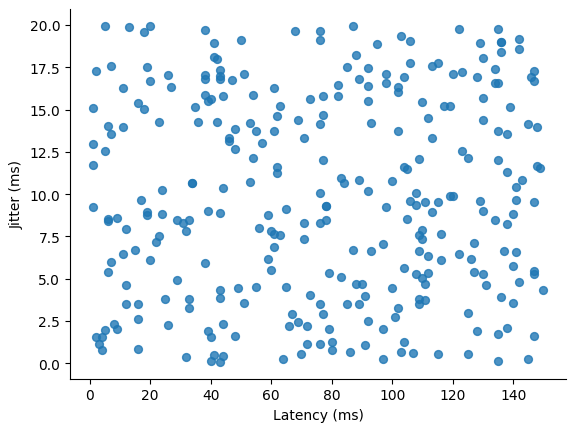

In [51]:
# @title Latency (ms) vs Jitter (ms)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Latency (ms)', y='Jitter (ms)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

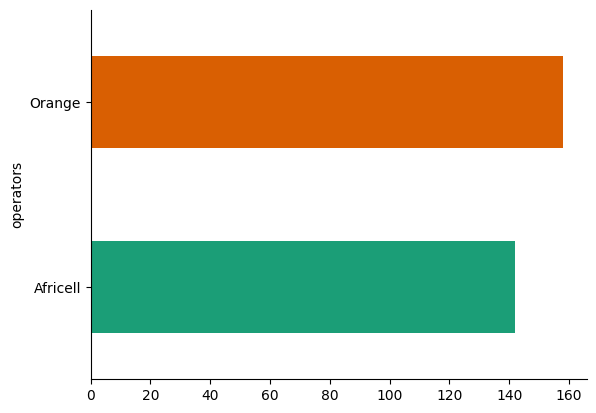

In [52]:
# @title operators

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('operators').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

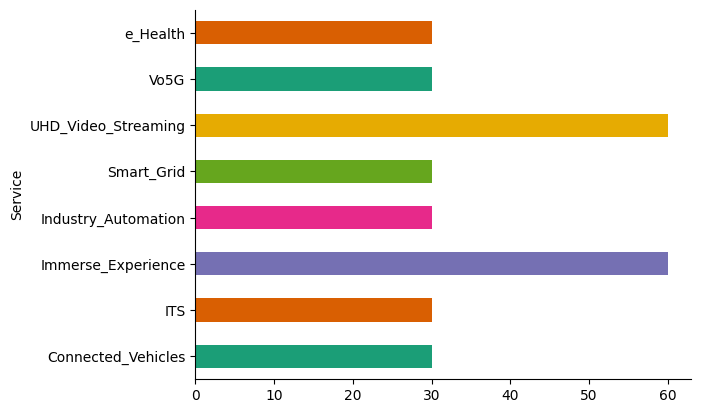

In [63]:
# @title Service

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Service').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

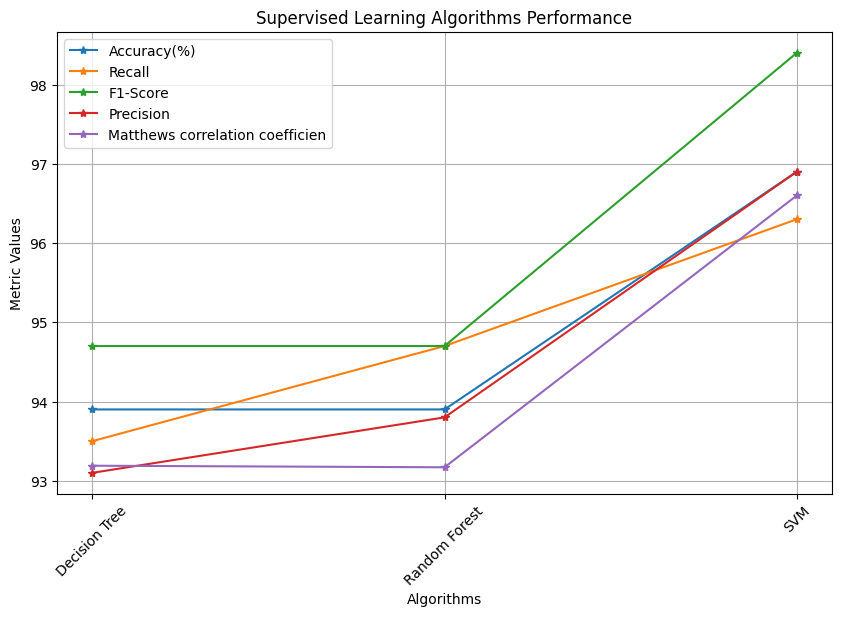

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    'Algorithms': ['Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy(%)': [93.9, 93.9, 96.9],
    'Recall': [93.5, 94.7, 96.3],
    'F1-Score': [94.7, 94.7, 98.4],
    'Precision': [93.1, 93.8, 96.9],
    'MCC': [93.19, 93.17, 96.6]
}

df = pd.DataFrame(data)

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Algorithms'], df['Accuracy(%)'], marker='*', label='Accuracy(%)')
plt.plot(df['Algorithms'], df['Recall'], marker='*', label='Recall')
plt.plot(df['Algorithms'], df['F1-Score'], marker='*', label='F1-Score')
plt.plot(df['Algorithms'], df['Precision'], marker='*', label='Precision')
plt.plot(df['Algorithms'], df['MCC'], marker='*', label='Matthews correlation coefficien')

plt.xlabel('Algorithms')
plt.ylabel('Metric Values')
plt.title('Supervised Learning Algorithms Performance')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
